In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm  import tqdm

In [3]:
train = pd.read_csv(r'C:\Users\Saiganne\Documents\\AI Projects\state-farm-distracted-driver-detection\driver_imgs_list.csv')

In [4]:
train.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [5]:
train.shape[0]

22424

In [6]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('C:/Users/Saiganne/Documents/AI projects/AI Projects/state-farm-distracted-driver-detection/train/'
                         +train['classname'][i]+'/'
                         +train['img'][i],target_size=(50,50,3),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|███████████████████████████████████████████████████████████████████████████| 22424/22424 [03:36<00:00, 103.46it/s]


In [7]:

y = train['classname'].values

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

In [10]:
integer_encoded

array([0, 0, 0, ..., 9, 9, 9])

In [11]:
y = to_categorical(integer_encoded)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50,50,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 17939 samples, validate on 4485 samples
Epoch 1/10


13600/17939 [=====================>........] - ETA: 1:56 - loss: 0.0039 - acc: 1.000 - ETA: 51s - loss: 0.0338 - acc: 0.989 - ETA: 38s - loss: 0.0349 - acc: 0.98 - ETA: 33s - loss: 0.0356 - acc: 0.97 - ETA: 29s - loss: 0.0365 - acc: 0.98 - ETA: 27s - loss: 0.0357 - acc: 0.98 - ETA: 26s - loss: 0.0423 - acc: 0.98 - ETA: 25s - loss: 0.0414 - acc: 0.98 - ETA: 24s - loss: 0.0405 - acc: 0.98 - ETA: 23s - loss: 0.0446 - acc: 0.98 - ETA: 22s - loss: 0.0452 - acc: 0.98 - ETA: 22s - loss: 0.0484 - acc: 0.97 - ETA: 22s - loss: 0.0450 - acc: 0.98 - ETA: 21s - loss: 0.0423 - acc: 0.98 - ETA: 21s - loss: 0.0438 - acc: 0.98 - ETA: 21s - loss: 0.0451 - acc: 0.97 - ETA: 20s - loss: 0.0447 - acc: 0.98 - ETA: 20s - loss: 0.0429 - acc: 0.98 - ETA: 20s - loss: 0.0415 - acc: 0.98 - ETA: 20s - loss: 0.0406 - acc: 0.98 - ETA: 20s - loss: 0.0405 - acc: 0.98 - ETA: 19s - loss: 0.0422 - acc: 0.98 - ETA: 19s - loss: 0.0408 - acc: 0.98 - ETA: 19s - loss: 0.0431 - acc: 0.98 - ETA: 19s - loss: 0.0454 - acc: 0.97 - 

13728/17939 [=====================>........] - ETA: 18s - loss: 0.0227 - acc: 1.00 - ETA: 19s - loss: 0.0403 - acc: 0.98 - ETA: 18s - loss: 0.0286 - acc: 0.99 - ETA: 18s - loss: 0.0214 - acc: 0.99 - ETA: 18s - loss: 0.0283 - acc: 0.98 - ETA: 18s - loss: 0.0261 - acc: 0.98 - ETA: 18s - loss: 0.0351 - acc: 0.98 - ETA: 18s - loss: 0.0326 - acc: 0.98 - ETA: 18s - loss: 0.0299 - acc: 0.98 - ETA: 18s - loss: 0.0287 - acc: 0.98 - ETA: 18s - loss: 0.0265 - acc: 0.98 - ETA: 18s - loss: 0.0326 - acc: 0.98 - ETA: 18s - loss: 0.0322 - acc: 0.98 - ETA: 18s - loss: 0.0304 - acc: 0.98 - ETA: 18s - loss: 0.0314 - acc: 0.98 - ETA: 18s - loss: 0.0339 - acc: 0.98 - ETA: 18s - loss: 0.0340 - acc: 0.98 - ETA: 17s - loss: 0.0326 - acc: 0.98 - ETA: 17s - loss: 0.0319 - acc: 0.98 - ETA: 17s - loss: 0.0345 - acc: 0.98 - ETA: 17s - loss: 0.0332 - acc: 0.98 - ETA: 17s - loss: 0.0343 - acc: 0.98 - ETA: 17s - loss: 0.0342 - acc: 0.98 - ETA: 17s - loss: 0.0331 - acc: 0.98 - ETA: 17s - loss: 0.0322 - acc: 0.98 - ETA

17939/17939 [==============================] - ETA: 4s - loss: 0.0430 - acc: 0.984 - ETA: 4s - loss: 0.0429 - acc: 0.984 - ETA: 4s - loss: 0.0430 - acc: 0.984 - ETA: 4s - loss: 0.0431 - acc: 0.984 - ETA: 4s - loss: 0.0431 - acc: 0.984 - ETA: 4s - loss: 0.0434 - acc: 0.984 - ETA: 4s - loss: 0.0434 - acc: 0.984 - ETA: 3s - loss: 0.0433 - acc: 0.984 - ETA: 3s - loss: 0.0436 - acc: 0.984 - ETA: 3s - loss: 0.0436 - acc: 0.984 - ETA: 3s - loss: 0.0434 - acc: 0.984 - ETA: 3s - loss: 0.0434 - acc: 0.984 - ETA: 3s - loss: 0.0436 - acc: 0.984 - ETA: 3s - loss: 0.0436 - acc: 0.984 - ETA: 3s - loss: 0.0437 - acc: 0.984 - ETA: 3s - loss: 0.0436 - acc: 0.984 - ETA: 3s - loss: 0.0437 - acc: 0.984 - ETA: 3s - loss: 0.0441 - acc: 0.984 - ETA: 3s - loss: 0.0440 - acc: 0.984 - ETA: 3s - loss: 0.0440 - acc: 0.984 - ETA: 3s - loss: 0.0441 - acc: 0.984 - ETA: 2s - loss: 0.0440 - acc: 0.984 - ETA: 2s - loss: 0.0441 - acc: 0.984 - ETA: 2s - loss: 0.0440 - acc: 0.984 - ETA: 2s - loss: 0.0440 - acc: 0.984 - ETA

13728/17939 [=====================>........] - ETA: 18s - loss: 0.0137 - acc: 1.00 - ETA: 18s - loss: 0.0172 - acc: 1.00 - ETA: 18s - loss: 0.0175 - acc: 1.00 - ETA: 18s - loss: 0.0218 - acc: 1.00 - ETA: 18s - loss: 0.0276 - acc: 0.99 - ETA: 18s - loss: 0.0278 - acc: 0.99 - ETA: 18s - loss: 0.0406 - acc: 0.98 - ETA: 18s - loss: 0.0519 - acc: 0.98 - ETA: 18s - loss: 0.0469 - acc: 0.98 - ETA: 18s - loss: 0.0464 - acc: 0.98 - ETA: 18s - loss: 0.0465 - acc: 0.98 - ETA: 18s - loss: 0.0460 - acc: 0.98 - ETA: 18s - loss: 0.0431 - acc: 0.98 - ETA: 18s - loss: 0.0481 - acc: 0.98 - ETA: 18s - loss: 0.0466 - acc: 0.98 - ETA: 18s - loss: 0.0444 - acc: 0.98 - ETA: 18s - loss: 0.0421 - acc: 0.98 - ETA: 17s - loss: 0.0403 - acc: 0.98 - ETA: 17s - loss: 0.0402 - acc: 0.98 - ETA: 17s - loss: 0.0417 - acc: 0.98 - ETA: 17s - loss: 0.0438 - acc: 0.98 - ETA: 17s - loss: 0.0460 - acc: 0.98 - ETA: 17s - loss: 0.0460 - acc: 0.98 - ETA: 17s - loss: 0.0450 - acc: 0.98 - ETA: 17s - loss: 0.0464 - acc: 0.98 - ETA

13728/17939 [=====================>........] - ETA: 18s - loss: 0.0035 - acc: 1.00 - ETA: 18s - loss: 0.0607 - acc: 0.97 - ETA: 18s - loss: 0.0681 - acc: 0.96 - ETA: 18s - loss: 0.0772 - acc: 0.97 - ETA: 18s - loss: 0.0620 - acc: 0.97 - ETA: 18s - loss: 0.0606 - acc: 0.98 - ETA: 18s - loss: 0.0578 - acc: 0.97 - ETA: 18s - loss: 0.0901 - acc: 0.97 - ETA: 18s - loss: 0.0807 - acc: 0.97 - ETA: 18s - loss: 0.0729 - acc: 0.97 - ETA: 18s - loss: 0.0690 - acc: 0.97 - ETA: 18s - loss: 0.0698 - acc: 0.97 - ETA: 18s - loss: 0.0660 - acc: 0.97 - ETA: 18s - loss: 0.0676 - acc: 0.97 - ETA: 18s - loss: 0.0659 - acc: 0.97 - ETA: 18s - loss: 0.0622 - acc: 0.97 - ETA: 18s - loss: 0.0623 - acc: 0.97 - ETA: 17s - loss: 0.0593 - acc: 0.98 - ETA: 17s - loss: 0.0577 - acc: 0.98 - ETA: 17s - loss: 0.0566 - acc: 0.98 - ETA: 17s - loss: 0.0565 - acc: 0.98 - ETA: 17s - loss: 0.0579 - acc: 0.98 - ETA: 17s - loss: 0.0558 - acc: 0.98 - ETA: 17s - loss: 0.0542 - acc: 0.98 - ETA: 17s - loss: 0.0555 - acc: 0.98 - ETA

17939/17939 [==============================] - ETA: 4s - loss: 0.0435 - acc: 0.985 - ETA: 4s - loss: 0.0433 - acc: 0.985 - ETA: 4s - loss: 0.0436 - acc: 0.985 - ETA: 4s - loss: 0.0434 - acc: 0.985 - ETA: 4s - loss: 0.0435 - acc: 0.985 - ETA: 4s - loss: 0.0434 - acc: 0.985 - ETA: 4s - loss: 0.0434 - acc: 0.985 - ETA: 3s - loss: 0.0432 - acc: 0.985 - ETA: 3s - loss: 0.0435 - acc: 0.985 - ETA: 3s - loss: 0.0436 - acc: 0.985 - ETA: 3s - loss: 0.0435 - acc: 0.985 - ETA: 3s - loss: 0.0436 - acc: 0.984 - ETA: 3s - loss: 0.0434 - acc: 0.985 - ETA: 3s - loss: 0.0434 - acc: 0.985 - ETA: 3s - loss: 0.0433 - acc: 0.985 - ETA: 3s - loss: 0.0433 - acc: 0.985 - ETA: 3s - loss: 0.0435 - acc: 0.984 - ETA: 3s - loss: 0.0434 - acc: 0.984 - ETA: 3s - loss: 0.0433 - acc: 0.985 - ETA: 3s - loss: 0.0431 - acc: 0.985 - ETA: 3s - loss: 0.0433 - acc: 0.985 - ETA: 2s - loss: 0.0436 - acc: 0.984 - ETA: 2s - loss: 0.0439 - acc: 0.984 - ETA: 2s - loss: 0.0438 - acc: 0.984 - ETA: 2s - loss: 0.0438 - acc: 0.984 - ETA

13728/17939 [=====================>........] - ETA: 17s - loss: 0.0163 - acc: 1.00 - ETA: 18s - loss: 0.0325 - acc: 0.97 - ETA: 18s - loss: 0.0409 - acc: 0.98 - ETA: 18s - loss: 0.0454 - acc: 0.97 - ETA: 18s - loss: 0.0491 - acc: 0.96 - ETA: 18s - loss: 0.0470 - acc: 0.97 - ETA: 18s - loss: 0.0462 - acc: 0.97 - ETA: 18s - loss: 0.0406 - acc: 0.97 - ETA: 18s - loss: 0.0443 - acc: 0.97 - ETA: 18s - loss: 0.0573 - acc: 0.97 - ETA: 18s - loss: 0.0545 - acc: 0.97 - ETA: 18s - loss: 0.0568 - acc: 0.97 - ETA: 18s - loss: 0.0525 - acc: 0.97 - ETA: 18s - loss: 0.0527 - acc: 0.97 - ETA: 18s - loss: 0.0594 - acc: 0.97 - ETA: 18s - loss: 0.0569 - acc: 0.97 - ETA: 17s - loss: 0.0560 - acc: 0.98 - ETA: 17s - loss: 0.0566 - acc: 0.97 - ETA: 17s - loss: 0.0578 - acc: 0.97 - ETA: 17s - loss: 0.0561 - acc: 0.97 - ETA: 17s - loss: 0.0571 - acc: 0.97 - ETA: 17s - loss: 0.0562 - acc: 0.97 - ETA: 17s - loss: 0.0548 - acc: 0.97 - ETA: 17s - loss: 0.0552 - acc: 0.97 - ETA: 17s - loss: 0.0546 - acc: 0.97 - ETA

13728/17939 [=====================>........] - ETA: 18s - loss: 0.0078 - acc: 1.00 - ETA: 19s - loss: 0.0159 - acc: 0.98 - ETA: 19s - loss: 0.0204 - acc: 0.98 - ETA: 18s - loss: 0.0195 - acc: 0.98 - ETA: 18s - loss: 0.0157 - acc: 0.98 - ETA: 18s - loss: 0.0159 - acc: 0.99 - ETA: 18s - loss: 0.0190 - acc: 0.99 - ETA: 18s - loss: 0.0215 - acc: 0.98 - ETA: 18s - loss: 0.0191 - acc: 0.99 - ETA: 18s - loss: 0.0197 - acc: 0.99 - ETA: 18s - loss: 0.0230 - acc: 0.99 - ETA: 18s - loss: 0.0234 - acc: 0.99 - ETA: 18s - loss: 0.0294 - acc: 0.99 - ETA: 18s - loss: 0.0286 - acc: 0.99 - ETA: 18s - loss: 0.0317 - acc: 0.99 - ETA: 18s - loss: 0.0299 - acc: 0.99 - ETA: 18s - loss: 0.0304 - acc: 0.98 - ETA: 18s - loss: 0.0364 - acc: 0.98 - ETA: 18s - loss: 0.0403 - acc: 0.98 - ETA: 18s - loss: 0.0415 - acc: 0.98 - ETA: 17s - loss: 0.0396 - acc: 0.98 - ETA: 17s - loss: 0.0418 - acc: 0.98 - ETA: 17s - loss: 0.0455 - acc: 0.98 - ETA: 17s - loss: 0.0440 - acc: 0.98 - ETA: 17s - loss: 0.0436 - acc: 0.98 - ETA

17939/17939 [==============================] - ETA: 4s - loss: 0.0307 - acc: 0.988 - ETA: 4s - loss: 0.0305 - acc: 0.988 - ETA: 4s - loss: 0.0316 - acc: 0.988 - ETA: 4s - loss: 0.0316 - acc: 0.988 - ETA: 4s - loss: 0.0317 - acc: 0.988 - ETA: 4s - loss: 0.0316 - acc: 0.988 - ETA: 4s - loss: 0.0315 - acc: 0.988 - ETA: 3s - loss: 0.0318 - acc: 0.988 - ETA: 3s - loss: 0.0318 - acc: 0.988 - ETA: 3s - loss: 0.0317 - acc: 0.988 - ETA: 3s - loss: 0.0316 - acc: 0.988 - ETA: 3s - loss: 0.0315 - acc: 0.988 - ETA: 3s - loss: 0.0314 - acc: 0.988 - ETA: 3s - loss: 0.0314 - acc: 0.988 - ETA: 3s - loss: 0.0315 - acc: 0.988 - ETA: 3s - loss: 0.0315 - acc: 0.988 - ETA: 3s - loss: 0.0314 - acc: 0.988 - ETA: 3s - loss: 0.0313 - acc: 0.988 - ETA: 3s - loss: 0.0312 - acc: 0.988 - ETA: 3s - loss: 0.0313 - acc: 0.988 - ETA: 3s - loss: 0.0317 - acc: 0.988 - ETA: 3s - loss: 0.0319 - acc: 0.988 - ETA: 2s - loss: 0.0318 - acc: 0.988 - ETA: 2s - loss: 0.0318 - acc: 0.988 - ETA: 2s - loss: 0.0320 - acc: 0.988 - ETA

13728/17939 [=====================>........] - ETA: 17s - loss: 0.0093 - acc: 1.00 - ETA: 18s - loss: 0.0135 - acc: 1.00 - ETA: 18s - loss: 0.0144 - acc: 0.99 - ETA: 18s - loss: 0.0118 - acc: 0.99 - ETA: 18s - loss: 0.0240 - acc: 0.98 - ETA: 18s - loss: 0.0248 - acc: 0.98 - ETA: 18s - loss: 0.0425 - acc: 0.98 - ETA: 18s - loss: 0.0386 - acc: 0.98 - ETA: 18s - loss: 0.0419 - acc: 0.98 - ETA: 18s - loss: 0.0436 - acc: 0.98 - ETA: 18s - loss: 0.0445 - acc: 0.98 - ETA: 18s - loss: 0.0436 - acc: 0.98 - ETA: 18s - loss: 0.0404 - acc: 0.98 - ETA: 18s - loss: 0.0458 - acc: 0.98 - ETA: 18s - loss: 0.0427 - acc: 0.98 - ETA: 18s - loss: 0.0435 - acc: 0.98 - ETA: 17s - loss: 0.0426 - acc: 0.98 - ETA: 17s - loss: 0.0406 - acc: 0.98 - ETA: 17s - loss: 0.0390 - acc: 0.98 - ETA: 17s - loss: 0.0373 - acc: 0.98 - ETA: 17s - loss: 0.0441 - acc: 0.98 - ETA: 17s - loss: 0.0447 - acc: 0.98 - ETA: 17s - loss: 0.0456 - acc: 0.98 - ETA: 17s - loss: 0.0440 - acc: 0.98 - ETA: 17s - loss: 0.0432 - acc: 0.98 - ETA

13728/17939 [=====================>........] - ETA: 18s - loss: 0.0122 - acc: 1.00 - ETA: 18s - loss: 0.0140 - acc: 1.00 - ETA: 18s - loss: 0.0111 - acc: 1.00 - ETA: 18s - loss: 0.0153 - acc: 0.99 - ETA: 18s - loss: 0.0240 - acc: 0.99 - ETA: 18s - loss: 0.0216 - acc: 0.99 - ETA: 18s - loss: 0.0191 - acc: 0.99 - ETA: 18s - loss: 0.0214 - acc: 0.99 - ETA: 18s - loss: 0.0198 - acc: 0.99 - ETA: 18s - loss: 0.0184 - acc: 0.99 - ETA: 18s - loss: 0.0173 - acc: 0.99 - ETA: 18s - loss: 0.0245 - acc: 0.99 - ETA: 18s - loss: 0.0250 - acc: 0.99 - ETA: 18s - loss: 0.0240 - acc: 0.99 - ETA: 18s - loss: 0.0224 - acc: 0.99 - ETA: 18s - loss: 0.0247 - acc: 0.99 - ETA: 18s - loss: 0.0237 - acc: 0.99 - ETA: 18s - loss: 0.0235 - acc: 0.99 - ETA: 17s - loss: 0.0247 - acc: 0.99 - ETA: 17s - loss: 0.0239 - acc: 0.99 - ETA: 17s - loss: 0.0263 - acc: 0.99 - ETA: 17s - loss: 0.0268 - acc: 0.99 - ETA: 17s - loss: 0.0261 - acc: 0.99 - ETA: 17s - loss: 0.0267 - acc: 0.99 - ETA: 17s - loss: 0.0261 - acc: 0.99 - ETA

17939/17939 [==============================] - ETA: 4s - loss: 0.0312 - acc: 0.989 - ETA: 4s - loss: 0.0311 - acc: 0.989 - ETA: 4s - loss: 0.0315 - acc: 0.989 - ETA: 4s - loss: 0.0314 - acc: 0.989 - ETA: 4s - loss: 0.0313 - acc: 0.989 - ETA: 4s - loss: 0.0312 - acc: 0.989 - ETA: 4s - loss: 0.0315 - acc: 0.989 - ETA: 3s - loss: 0.0314 - acc: 0.989 - ETA: 3s - loss: 0.0314 - acc: 0.989 - ETA: 3s - loss: 0.0313 - acc: 0.989 - ETA: 3s - loss: 0.0312 - acc: 0.989 - ETA: 3s - loss: 0.0312 - acc: 0.989 - ETA: 3s - loss: 0.0313 - acc: 0.989 - ETA: 3s - loss: 0.0312 - acc: 0.989 - ETA: 3s - loss: 0.0311 - acc: 0.989 - ETA: 3s - loss: 0.0314 - acc: 0.989 - ETA: 3s - loss: 0.0314 - acc: 0.989 - ETA: 3s - loss: 0.0314 - acc: 0.989 - ETA: 3s - loss: 0.0313 - acc: 0.989 - ETA: 3s - loss: 0.0312 - acc: 0.989 - ETA: 3s - loss: 0.0311 - acc: 0.989 - ETA: 2s - loss: 0.0310 - acc: 0.989 - ETA: 2s - loss: 0.0312 - acc: 0.989 - ETA: 2s - loss: 0.0311 - acc: 0.989 - ETA: 2s - loss: 0.0310 - acc: 0.989 - ETA

13728/17939 [=====================>........] - ETA: 18s - loss: 0.0045 - acc: 1.00 - ETA: 18s - loss: 0.0137 - acc: 1.00 - ETA: 18s - loss: 0.0187 - acc: 0.99 - ETA: 18s - loss: 0.0145 - acc: 0.99 - ETA: 18s - loss: 0.0238 - acc: 0.98 - ETA: 18s - loss: 0.0302 - acc: 0.98 - ETA: 18s - loss: 0.0298 - acc: 0.98 - ETA: 18s - loss: 0.0260 - acc: 0.98 - ETA: 18s - loss: 0.0295 - acc: 0.98 - ETA: 18s - loss: 0.0293 - acc: 0.98 - ETA: 18s - loss: 0.0266 - acc: 0.98 - ETA: 18s - loss: 0.0253 - acc: 0.99 - ETA: 18s - loss: 0.0240 - acc: 0.99 - ETA: 18s - loss: 0.0236 - acc: 0.99 - ETA: 18s - loss: 0.0231 - acc: 0.99 - ETA: 18s - loss: 0.0227 - acc: 0.99 - ETA: 18s - loss: 0.0223 - acc: 0.99 - ETA: 18s - loss: 0.0235 - acc: 0.99 - ETA: 17s - loss: 0.0236 - acc: 0.99 - ETA: 17s - loss: 0.0226 - acc: 0.99 - ETA: 17s - loss: 0.0283 - acc: 0.98 - ETA: 17s - loss: 0.0280 - acc: 0.98 - ETA: 17s - loss: 0.0274 - acc: 0.99 - ETA: 17s - loss: 0.0277 - acc: 0.99 - ETA: 17s - loss: 0.0295 - acc: 0.98 - ETA

13728/17939 [=====================>........] - ETA: 18s - loss: 0.0028 - acc: 1.00 - ETA: 18s - loss: 0.0106 - acc: 1.00 - ETA: 18s - loss: 0.0308 - acc: 0.98 - ETA: 18s - loss: 0.0257 - acc: 0.99 - ETA: 18s - loss: 0.0239 - acc: 0.98 - ETA: 18s - loss: 0.0281 - acc: 0.98 - ETA: 18s - loss: 0.0246 - acc: 0.98 - ETA: 18s - loss: 0.0307 - acc: 0.98 - ETA: 18s - loss: 0.0300 - acc: 0.98 - ETA: 18s - loss: 0.0275 - acc: 0.98 - ETA: 18s - loss: 0.0266 - acc: 0.98 - ETA: 18s - loss: 0.0297 - acc: 0.98 - ETA: 18s - loss: 0.0297 - acc: 0.98 - ETA: 18s - loss: 0.0278 - acc: 0.98 - ETA: 18s - loss: 0.0276 - acc: 0.98 - ETA: 18s - loss: 0.0285 - acc: 0.98 - ETA: 18s - loss: 0.0362 - acc: 0.98 - ETA: 18s - loss: 0.0355 - acc: 0.98 - ETA: 18s - loss: 0.0353 - acc: 0.98 - ETA: 18s - loss: 0.0340 - acc: 0.98 - ETA: 17s - loss: 0.0347 - acc: 0.98 - ETA: 17s - loss: 0.0334 - acc: 0.98 - ETA: 17s - loss: 0.0323 - acc: 0.98 - ETA: 17s - loss: 0.0329 - acc: 0.98 - ETA: 17s - loss: 0.0320 - acc: 0.98 - ETA

17939/17939 [==============================] - ETA: 4s - loss: 0.0321 - acc: 0.988 - ETA: 4s - loss: 0.0319 - acc: 0.988 - ETA: 4s - loss: 0.0322 - acc: 0.988 - ETA: 4s - loss: 0.0324 - acc: 0.988 - ETA: 4s - loss: 0.0323 - acc: 0.988 - ETA: 4s - loss: 0.0323 - acc: 0.988 - ETA: 4s - loss: 0.0322 - acc: 0.988 - ETA: 3s - loss: 0.0321 - acc: 0.988 - ETA: 3s - loss: 0.0320 - acc: 0.988 - ETA: 3s - loss: 0.0319 - acc: 0.988 - ETA: 3s - loss: 0.0318 - acc: 0.988 - ETA: 3s - loss: 0.0317 - acc: 0.988 - ETA: 3s - loss: 0.0321 - acc: 0.988 - ETA: 3s - loss: 0.0321 - acc: 0.988 - ETA: 3s - loss: 0.0320 - acc: 0.988 - ETA: 3s - loss: 0.0320 - acc: 0.988 - ETA: 3s - loss: 0.0320 - acc: 0.988 - ETA: 3s - loss: 0.0320 - acc: 0.988 - ETA: 3s - loss: 0.0321 - acc: 0.988 - ETA: 3s - loss: 0.0321 - acc: 0.988 - ETA: 3s - loss: 0.0320 - acc: 0.988 - ETA: 3s - loss: 0.0319 - acc: 0.988 - ETA: 2s - loss: 0.0318 - acc: 0.988 - ETA: 2s - loss: 0.0317 - acc: 0.988 - ETA: 2s - loss: 0.0315 - acc: 0.988 - ETA

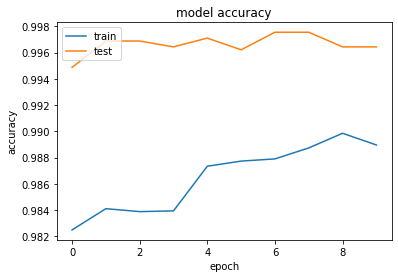

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
test = pd.read_csv('C:/Users/Saiganne/Documents/AI projects/AI Projects/state-farm-distracted-driver-detection/sample_submission.csv')

In [17]:
test.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [18]:
test.drop(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'],axis=1,inplace=True)

In [19]:
test.head()

,img
0,img_1.jpg
1,img_10.jpg
2,img_100.jpg
3,img_1000.jpg
4,img_100000.jpg


In [20]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img =  image.load_img('C:/Users/Saiganne/Documents/AI projects/AI Projects/state-farm-distracted-driver-detection/test/'
                         +test['img'][i],target_size=(50,50,3),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

test = np.array(test_image)


100%|████████████████████████████████████████████████████████████████████████████| 79726/79726 [13:31<00:00, 98.27it/s]


In [21]:
# making predictions
prediction = model.predict_proba(test)

In [22]:
classProbs = pd.DataFrame(prediction)

In [23]:
test_csv= pd.read_csv('C:/Users/Saiganne/Documents/AI projects/AI Projects/state-farm-distracted-driver-detection/sample_submission.csv')

In [24]:
test_csv.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [25]:
test_csv.drop(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'],axis=1,inplace=True)

In [26]:
test_csv.head()

,img
0,img_1.jpg
1,img_10.jpg
2,img_100.jpg
3,img_1000.jpg
4,img_100000.jpg


In [27]:
test_csv = pd.concat([test_csv,classProbs],axis=1)

In [28]:
for i in range(10):
    test_csv[i] = round(test_csv[i],5)

In [61]:
test_csv.head(10)

,img,0,1,2,3,4,5,6,7,8,9
0,img_1.jpg,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1,img_10.jpg,0.00002,0.00000,0.00000,0.00000,0.00000,0.99997,0.00000,0.00000,0.00000,0.00001
2,img_100.jpg,0.19895,0.00001,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00011,0.80092
3,img_1000.jpg,0.01322,0.34739,0.00430,0.00187,0.00073,0.00528,0.52547,0.07694,0.02412,0.00068
4,img_100000.jpg,0.03447,0.00000,0.00001,0.00145,0.00341,0.01378,0.00002,0.00001,0.00685,0.94000
5,img_100001.jpg,0.00000,0.02262,0.00000,0.97737,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,img_100002.jpg,0.00001,0.95550,0.00000,0.00002,0.00000,0.00000,0.00004,0.00000,0.00000,0.04444
7,img_100003.jpg,0.06652,0.00223,0.00034,0.00048,0.00050,0.92646,0.00000,0.00041,0.00008,0.00298
8,img_100004.jpg,0.00000,0.00000,0.23573,0.00000,0.00000,0.00003,0.76239,0.00000,0.00185,0.00000
9,img_100005.jpg,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


In [30]:
np.unique(integer_encoded)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.unique(train['classname'].values)

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

In [63]:
test_csv.head(10)

,img,0,1,2,3,4,5,6,7,8,9
0,img_1.jpg,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1,img_10.jpg,0.00002,0.00000,0.00000,0.00000,0.00000,0.99997,0.00000,0.00000,0.00000,0.00001
2,img_100.jpg,0.19895,0.00001,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00011,0.80092
3,img_1000.jpg,0.01322,0.34739,0.00430,0.00187,0.00073,0.00528,0.52547,0.07694,0.02412,0.00068
4,img_100000.jpg,0.03447,0.00000,0.00001,0.00145,0.00341,0.01378,0.00002,0.00001,0.00685,0.94000
5,img_100001.jpg,0.00000,0.02262,0.00000,0.97737,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,img_100002.jpg,0.00001,0.95550,0.00000,0.00002,0.00000,0.00000,0.00004,0.00000,0.00000,0.04444
7,img_100003.jpg,0.06652,0.00223,0.00034,0.00048,0.00050,0.92646,0.00000,0.00041,0.00008,0.00298
8,img_100004.jpg,0.00000,0.00000,0.23573,0.00000,0.00000,0.00003,0.76239,0.00000,0.00185,0.00000
9,img_100005.jpg,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000


In [33]:
#c0: safe driving
#c1: texting - right
#c2: talking on the phone - right
#c3: texting - left
#c4: talking on the phone - left
#c5: operating the radio
#c6: drinking
#c7: reaching behind
#c8: hair and makeup
#c9: talking to passenger

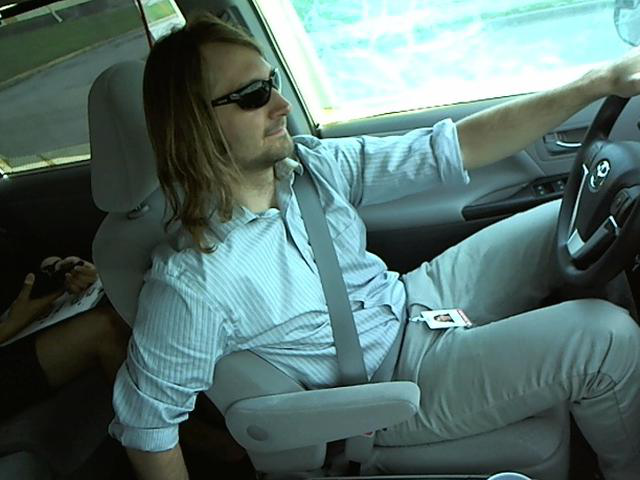

In [65]:
image.load_img('C:/Users/Saiganne/Documents/AI projects/AI Projects/state-farm-distracted-driver-detection
               /test/img_100004.jpg'
               ,target_size=(480,640,3),grayscale=False)
